- Name: Lim Yu Liang
- Admin Number: 2227452
- Title: Improving the Tourism Industry in Singapore

Context/Overarching Question:

- 2015 is around the corner and Singapore Tourism Board (STB), wants you to analyse Singapore's Tourism industry in order to help them improve.

- Aiming to assist STB in capitalizing on money-making opportunities and maximizing the industry's potential. By exploring patterns in tourist behavior, accommodation preferences, and expenditure trends.

- Provide STB with data-driven insights, enabling them to strategically invest in areas that will yield the highest returns, improve visitor satisfaction

Key points to take note of:

- Singapore makes a lot of money from tourists 
    - What are the categories whereby Singapore is earning money from tourists?
    - Are all categories stable? Which category is considered the most stable?
    
                                                    ========
                                                    
- Among the many categories, there are sub categories to take into an account
    - Which sub-categories makes up most of the categories's earnings?
    
                                                    ========

- Tourism business heavily relies on the number of tourists that come into Singapore
    - What is the trends for number of Visitor Arrivals in Singapore during recent years like?
    - Is the number of Visitor Arrivals rising, dropping or maintaining consistency?
    - How does the revenue of selected category reflect based on the number of Visitor Arrivals?
    
                                                    ========

- Tourists arrival rates are unpredictable and may rise or fall anytime depending on seasonal peaks/dips.
  - When are the peaks and dips in Visitor Arrivals for Singapore?
  - How can STB capitalise on these rises and falls to increase revenue?
  
                                                  ========
  
- Put yourself in the tourists' shoes
  - It is crucial to empathize with tourists and understand their perspective. Rather than simply seeking ways to inflate prices for financial gain, focus on finding the most optimal price range for the categories of interest. This will help maintain satisfaction as well as experience for the tourist, potentially motivating tourists to return.
  
  - Each individual's financial capacity differs, and the aim is to identify price points that resonate with most tourists. Striking a balance where visitors find value in their experiences without feeling financially burdened.

  

=======================================================================================================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Read the data from the csv file
df_1 = pd.read_csv('./international-arrival/total-visitor-international-arrivals-monthly.csv', names=['month', 'total_international_visitor_arrivals'], skiprows=409)
df_2 = pd.read_csv('./tourist-receipts/annual-tourism-receipts-by-major-components.csv', names=['period', 'components','tot_tr','trpce'])
df_3 = pd.read_csv('./international-arrival/visitor-international-arrivals-to-singapore-by-country-monthly.csv', names=['month','region','country','no_of_visitor_arrivals'], skiprows=12505)
df_4 = pd.read_csv('./international-arrival/visitor-international-arrivals-to-singapore-by-region-monthly.csv', names=['month','region','no_of_visitor_arrivals'], skiprows=2101)
df_5 = pd.read_csv('./international-arrival/international-visitor-arrivals-by-country-of-nationality.csv', names=['period', 'region', 'con', 'arv_count'])
df_6 = pd.read_csv('./hotel-related/overseas-visitors-survey-visitors-profile-data-accommodation.csv', names=['period', 'region', 'cor', 'hotel', 'friends_relatives', 'others'])
df_7 = pd.read_csv('./hotel-related/monthly-gazetted-hotels-statistics.csv', names=['period', 'max', 'paid', 'available', 'occupied', 'aor', 'rm_revenue', 'arr', 'revpar'])
df_8 = pd.read_csv('./hotel-related/monthly-gazetted-hotel-statistics-by-tier.csv', names=['period', 'tier', 'aor', 'arr', 'revpar'])

def sanitise_data_sets():

    df_1.drop_duplicates(subset=['month'], keep='first', inplace=True)
    df_3.drop_duplicates(subset=['month', 'country'], keep='first', inplace=True)
    df_4.drop_duplicates(subset=['month', 'region'], keep='first', inplace=True)
    df_5.drop_duplicates(subset=['period', 'con'], keep='first', inplace=True)
    df_6.drop_duplicates(subset=['period', 'cor'], keep='first', inplace=True)
    df_8.drop_duplicates(subset=['period', 'tier'], keep='first', inplace=True)


sanitise_data_sets()
data_years = ['2013', '2014']




Graph 1 - Pie Chart

Dataset used: 
- annual-tourism-receipts-by-major-components.csv


Nature of the datasets:
- "annual-tourism-receipts-by-major-components.csv": This dataset contains information about the total amount of money collected from each category of tourism (e.g. Accomodation, Entertainment, Food & Beverages...) from 2013 and 2014


Question/Goal:
- Which category(s) is providing Singapore with the most amount of money during recent years? (has the highest and market activity and consistency)
- Are all category(s) stable in the long run?

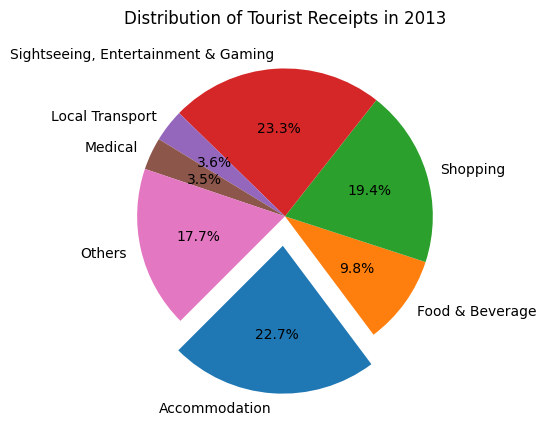

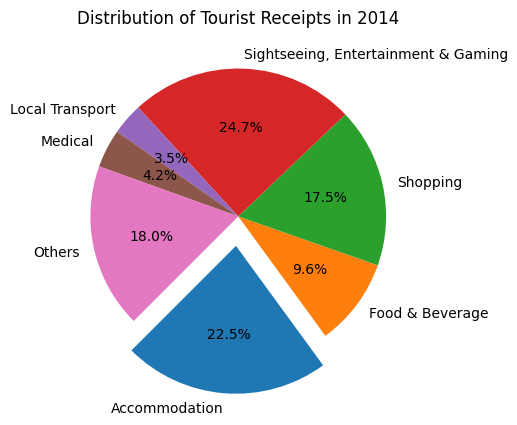

In [2]:
for i in range(len(data_years)):

    receipts = []
    components = []

    for index, row in df_2.iterrows():

        year = row['period']
        component = row['components']
        tourist_receipts = row['tot_tr']

        if year == data_years[i] and component != 'All Components':
            receipts.append(tourist_receipts)
            components.append(component)
    
    explode = [0.2, 0, 0, 0, 0, 0, 0]
    plt.pie(receipts, labels=components, autopct='%1.1f%%', startangle=225, explode=explode)
    plt.title('Distribution of Tourist Receipts in ' + data_years[i])
    plt.show()

    
    
        



Findings and Insight:

 - Based on the displayed Pie Chart, it shows that there are 2 major categories that is bringing in the most money for Singapore.

 - "Sightseeing, Entertainment & Gaming" and "Accomodation"

 - "Sightseeing, Entertainment & Gaming" is seeing an increase in receipts by a whole 1.4%

 - The increase in "Sightseeing, Entertainment & Gaming" and other categories such as "Medical" has caused categories such as "Shopping" and "Accomodation" to drop

 - Accomodation only drops by 0.2% while Shopping experiences a 1.9%

Summary:
- The ideal places for STB to focus on in order to increase revenue would naturally be "Accomodation" and "Sightseeing, Entertainment & Gaming" since they have the highest money collecting capability. 

- However, even though "Sightseeing, Entertainment & Gaming" is experiencing an increase from 2013-2014, it is not a very stable form of attraction, especially for a place like Singapore. This is because Singapore is a very small country, things tied to "Sightseeing, Entertainment & Gaming" are quite limited, and could turn boring very quickly in the future for recurring visitors.

- Hence, the best category for STB to focus on would be on Accomodation, this is because when travelling to anywhere, daily necessities such as having a shelter/place to sleep is important, naturally all tourists must find a place to stay for the night(s). This makes Accomodation one of the most stable and high money-bringing category in the long run.

=======================================================================================================================================

Graph 2 - Bar Graph

Dataset used: 
- overseas-visitors-survey-visitors-profile-data-accommodation.csv

Nature of the dataset:
- This dataset contains information on the Occupancy rate (%) for each type of Accomodation in Singapore based on Regions from the Years 2013 and 2014

Pecularities:
- The asia regions are not nicely categorised into one single Category called Asia

Solution:
- Any row with 'asia' in it's region column, will be categorised as Asia in the list which it will be appended to

Questions/Goals:

- What is the percentage of people that stay in Hotels, Friends/relatives houses and Others from each region, respectively?

- Which accomodation type is the most popular among the different regions from recent years?

          Avg Hotel Occupancy  Avg Friends and Relatives  Avg Others
Regions                                                             
Africa                  68.00                       6.00       26.00
Americas                69.50                      15.00       15.50
Asia                    64.36                      17.73       18.00
Europe                  68.17                      11.33       20.17
Oceania                 73.00                       8.50       19.00


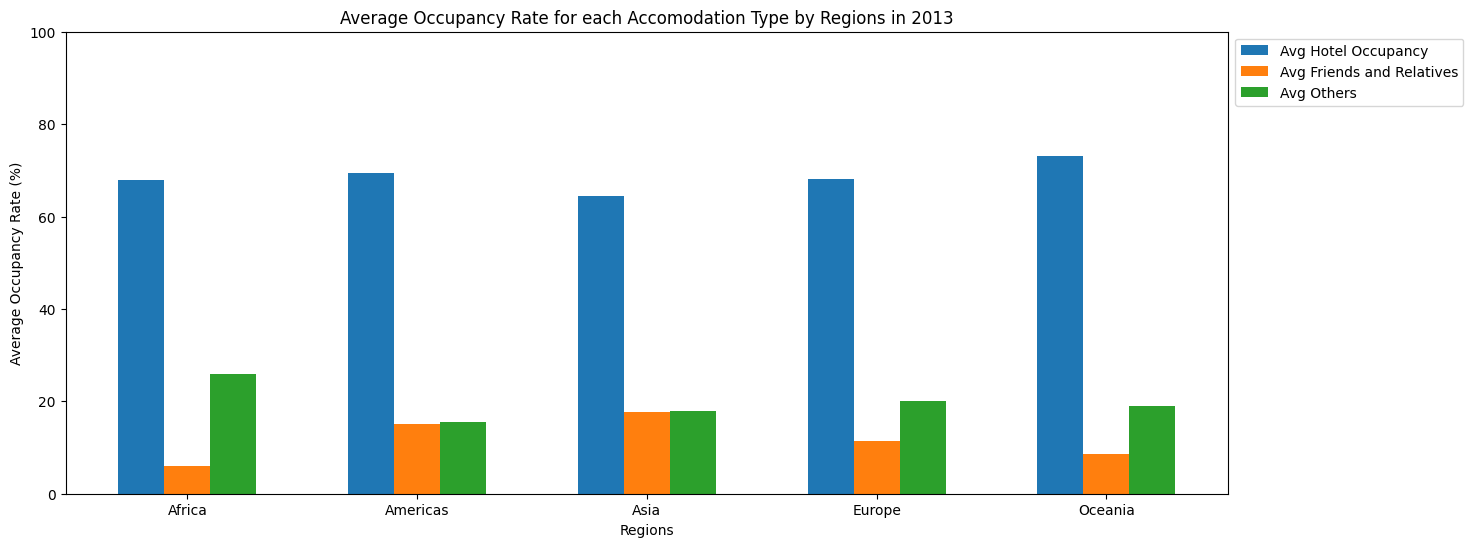

          Avg Hotel Occupancy  Avg Friends and Relatives  Avg Others
Regions                                                             
Africa                  56.00                       5.00       38.00
Americas                67.50                      15.50       17.50
Asia                    63.27                      19.82       17.00
Europe                  63.33                      13.83       22.67
Oceania                 73.50                      10.00       16.50


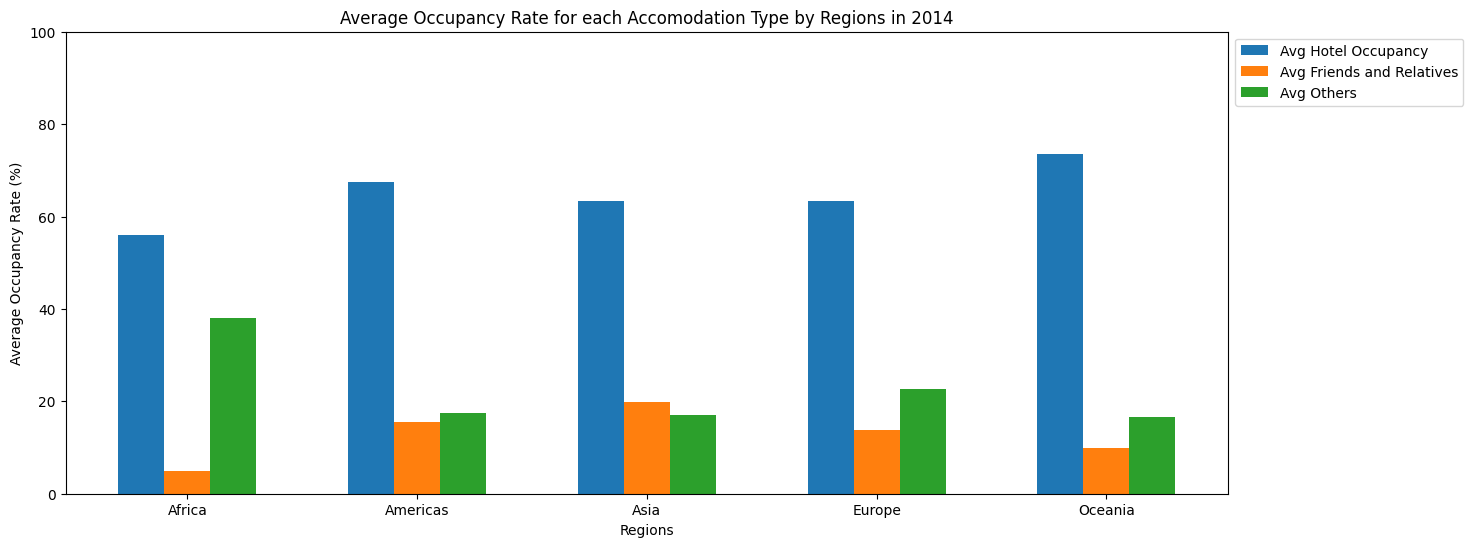

In [3]:
# Used to check for unique regions only
# unique_regions = df_6['region'].unique()
# print("Unique Regions:", unique_regions)

for i in range(len(data_years)):
    
    data = {}
    regions = []
    average_hotel_occupancy = []
    average_friends_relatives = []
    average_others = []
    
    for index, row in df_6.iterrows():

        # Convert 'hotel', 'friends_relatives', and 'others' columns to numeric data types
        row['hotel'] = pd.to_numeric(row['hotel'], errors='coerce')
        row['friends_relatives'] = pd.to_numeric(row['friends_relatives'], errors='coerce')
        row['others'] = pd.to_numeric(row['others'], errors='coerce')

        year = row['period']
        region = row['region']
        hotel = row['hotel']
        friends_relatives = row['friends_relatives']
        others = row['others']

        if year == data_years[i] and 'asia' in region.lower():
            region = 'Asia'
            
            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)

        elif year == data_years[i] and 'europe' in region.lower():
            region = 'Europe'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'africa' in region.lower():
            region = 'Africa'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'americas' in region.lower():
            region = 'Americas'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'oceania' in region.lower():
            region  = 'Oceania'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
    
    data['Regions'] = regions
    data['Avg Hotel Occupancy'] = average_hotel_occupancy
    data['Avg Friends and Relatives'] = average_friends_relatives
    data['Avg Others'] = average_others

    df = pd.DataFrame(data)

    grouped_mean = df.groupby('Regions').agg({
        'Avg Hotel Occupancy': 'mean',
        'Avg Friends and Relatives': 'mean',
        'Avg Others': 'mean'
    })

    print(grouped_mean.round(2))

    # Side-by-Side Bar Plot
    plt.figure(figsize=(15, 6))

    bar_width = 0.2
    index = range(len(grouped_mean))

    plt.bar(index, grouped_mean['Avg Hotel Occupancy'], bar_width, label='Avg Hotel Occupancy')
    plt.bar([i + bar_width for i in index], grouped_mean['Avg Friends and Relatives'], bar_width, label='Avg Friends and Relatives')
    plt.bar([i + 2 * bar_width for i in index], grouped_mean['Avg Others'], bar_width, label='Avg Others')


    plt.xlabel('Regions')
    plt.ylabel('Average Occupancy Rate (%)')
    plt.xticks([i + bar_width for i in index], grouped_mean.index)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('Average Occupancy Rate for each Accomodation Type by Regions in ' + data_years[i])
    # Set Y-axis limits to extend until 100
    plt.ylim(0, 100)
    plt.show()

    


            

            


    

Findings and Insight:

 - In both recent years 2013 and 2014, the average hotel occupancy has shown to be the highest across all 5 regions.

 - The average hotel occupancy rate remained relatively consistent throughout both years, and remained as the most popular accomodation type.


Summary:
- Across recent years (2013 and 2014), among the different types of accomodation available for tourists, hotels are the most popular and have remained relatively consistent throughout. This translate to a higher market activity for under the Hotel section, enabling more money making opportunities for STB within this field.

=======================================================================================================================================

Graph 3 & 4 - Line Graphs

Dataset used:
- visitor-international-arrivals-to-singapore-by-country-monthly.csv
- visitor-international-arrivals-to-singapore-by-region-monthly.csv
- international-visitor-arrivals-by-country-of-nationality.csv
- total-visitor-international-arrivals-monthly.csv
- monthly-gazetted-hotels-statistics.csv

Nature of the datasets:
- visitor-international-arrivals-to-singapore-by-country-monthly.csv: Data on total visitor arrivals by region and country each month

- visitor-international-arrivals-to-singapore-by-region-monthly.csv: Data on total visitor arrivals by region each month

- international-visitor-arrivals-by-country-of-nationality.csv: Data on total visitor arrivals by region and country each month

- total-visitor-international-arrivals-monthly.csv: Data on total visitor arrivals each month

- monthly-gazetted-hotels-statistics.csv:
    - Data on hotels by month which includes: max number of rooms, number rooms that were paid for, number of available rooms , number of occupied rooms, average occupancy rate, total room revenue, average room rate and revenue per available room

Pecularities:

- For the first 3 datasets, they contain slightly differing values on the same "data-type" (total visitor arrivals per month)

- Two of the datasets also included regions(and/or)countries, so the values were spreaded across multiple countries and regions while the other contains raw total for each month only

- In 'visitor-international-arrivals-to-singapore-by-country-monthly.csv', the country column has a value "Asean" with the total arrivals from Asean. But below Asean there are data for Asea countries as well, which could lead to unnecessary numbers being added, affecting overall accuracy


Solution:

- I took the total sum of visitor arrivals for each region(and/or)country per month, added the totals across the 4 datasets 

- I included a list of ASEAN countries, the loop will check whether the country is apart of the "asean_countries" list before allowing it to be assigned as a value to be added/appended onto the arrival_count list

Question/Goal:
- Identify the trend of monthly visitor arrivals throughout the years 2013 and 2014
- Identify the trend of monthly hotel revenue across 2013 and 2014
- Try to form a relation between both graphs

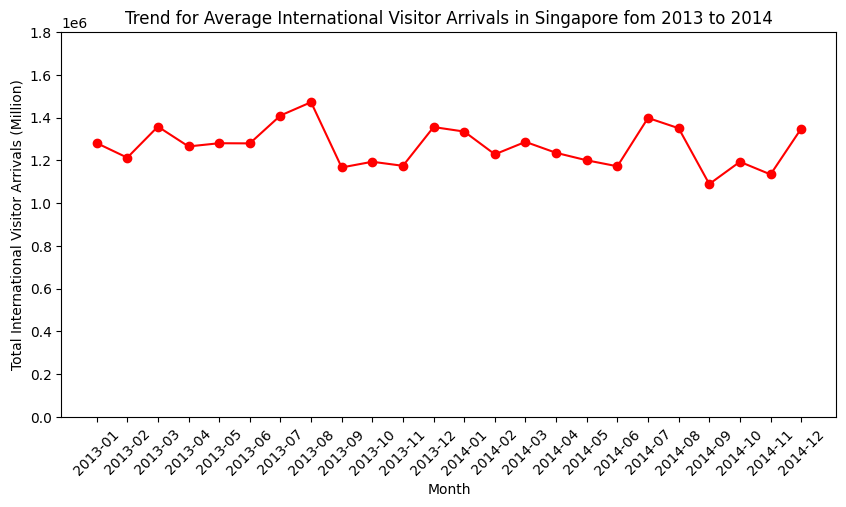

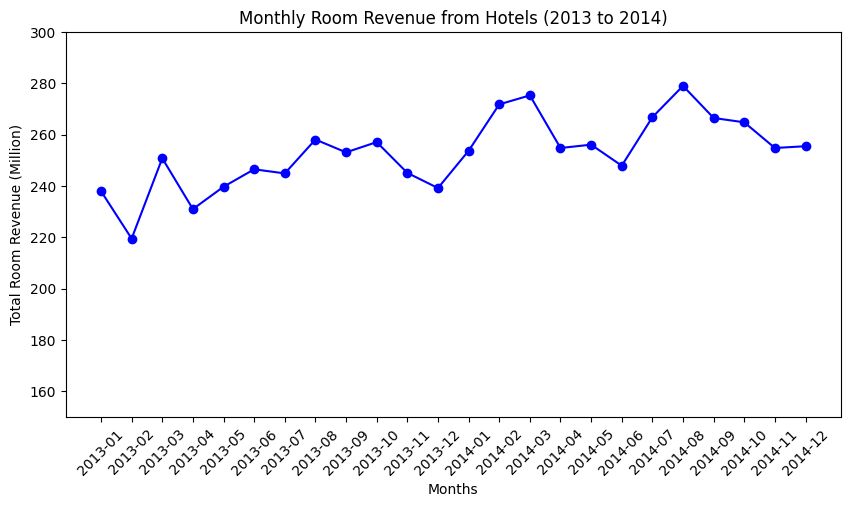

In [4]:
#======================================================================== Graph 3 ========================================================================

months_check = set()

data = {}

months = []
arrival_count = []

asean_countries = ['brunei', 'cambodia', 'indonesia', 'laos', 'malaysia', 'myanmar', 'philippines', 'singapore', 'thailand', 'vietnam']

for i in range(len(data_years)):

    temp_value = 0

    # Loop through the DataFrame df_1 using iterrows()
    for index, row in df_1.iterrows():

        month = row['month']
        total_international_visitors = pd.to_numeric(row['total_international_visitor_arrivals'], errors='coerce')

        if data_years[i] in month:

            if month not in months_check:

                months_check.add(month)
                months.append(month)

                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = total_international_visitors
                else:
                    temp_value = total_international_visitors 

            else:
                temp_value += total_international_visitors
    
    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0
    

    # Loop through the DataFrame df_3 using iterrows()

    for index, row in df_3.iterrows():

        month = row['month']
        no_of_visitor_arrivals_df3 = pd.to_numeric(row['no_of_visitor_arrivals'], errors='coerce')
        country = row['country']

        if data_years[i] in month:

            if month not in months_check:

                months_check.add(month)
                months.append(month)

                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = no_of_visitor_arrivals_df3
                elif country.lower() not in asean_countries:
                    temp_value = no_of_visitor_arrivals_df3 
                else:
                    continue

            elif country.lower() not in asean_countries:
                temp_value += no_of_visitor_arrivals_df3
            else:
                continue

    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0

    # Loop through the DataFrame df_4 using iterrows()
    for index, row in df_4.iterrows():

        month = row['month']
        no_of_tourist_arrivals_df4 = pd.to_numeric(row['no_of_visitor_arrivals'], errors='coerce')

        if data_years[i] in month:

            if month not in months_check:
                months_check.add(month)
                months.append(month)
                
                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = no_of_tourist_arrivals_df4
                else:
                    temp_value = no_of_tourist_arrivals_df4

            else:
                temp_value += no_of_tourist_arrivals_df4

    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0

    # Loop through the DataFrame df_5 using iterrows()
    for index, row in df_5.iterrows():
        month = row['period']
        arv_count_df5 = pd.to_numeric(row['arv_count'], errors='coerce')
        if data_years[i] in month:

            if month not in months_check:
                months_check.add(month)
                months.append(month)
                
                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = arv_count_df5
                else:
                    temp_value = arv_count_df5
            else:
                temp_value += arv_count_df5
    
    arrival_count.append(temp_value)
    months_check.clear()




data['Months'] = months
data['Mean Arrival Count'] = arrival_count

df = pd.DataFrame(data)

grouped_mean = df.groupby('Months').agg({
    'Mean Arrival Count': 'mean'
})

grouped_mean_arrival_count = grouped_mean.round(0)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(grouped_mean_arrival_count.index, grouped_mean_arrival_count['Mean Arrival Count'], color='red', marker='o')
# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Trend for Average International Visitor Arrivals in Singapore fom 2013 to 2014')
plt.xlabel('Month')
plt.ylabel('Total International Visitor Arrivals (Million)')
plt.ylim(0, 1800000)
plt.show()


#======================================================================== Graph 4 ========================================================================
x = []
y = []

for i in range(len(data_years)):

    for index, row in df_7.iterrows():

        month = row['period']
        total_room_revenue = pd.to_numeric(row['rm_revenue'], errors='coerce')

        if data_years[i] in month:
            x.append(month)
            y.append(total_room_revenue)
    
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue', marker='o')
# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Monthly Room Revenue from Hotels (2013 to 2014)')
plt.xlabel('Months')
plt.ylabel('Total Room Revenue (Million)')
plt.ylim(150, 300)
plt.show()

Findings and Insight (Graph 3):
- The trend for monthly visitor arrivals is relatively consistent, remaining about the same throughout both 2013 and 2014 (a slight overall upward slope in visitors)

- There are visible peaks and dips during certain months due to seasonal fluctuations (not weather). 

- Months that experience seasonal peaks: Febuary-March, June-August, November-December 
- Months that experience seasonal dips: December-Febuary, August-September
- Months that experience consistent tourist arrivals: March-June, September-November

- Though there are fluctuations, but they degree of fluctuation is not major, displaying degree of consistency for visitor arrivals every month. Thus, it shows that the degree of variation remains relatively minor, indicating a stable and consistent tourism industry. The fluctuations are also not severe, suggesting a steady and controlled pattern in visitor arrivals.

Findings and Insight (Graph 4):
- The monthly Room revenue from hotels follow closely with the trend of visitor arrivals, when there are dips, the revenue goes up but when there are dips, the revenue decreases.

- However, unlike the trend of visitor arrivals, the trend of monthly room revenues from hotels are on a steeper upward slope. Showing that the market activity and demand for hotel rooms is generally on the rise.


Summary:
- The findings emphasize the stability and consistency in Singapore's tourism industry, with seasonal variations influencing visitor arrivals and hotel room revenues. The upward trend in both visitor arrivals and hotel room revenues highlights the potential for continued growth and economic opportunities in the tourism sector for Singapore.

=======================================================================================================================================

Graph 5 - Box Plot

Dataset used:
- monthly-gazetted-hotel-statistics-by-tier.csv

Nature of the datasets:
- It provides information about the Average room rate (ARR), Average occupancy rate (AOR) and Revenue per available room (AOR X ARR) for hotel rooms of different tiers every month from 2013-2015 (not using data from 2015 because of "story-line")

Pretext:
- We have identified that the number of visitor arrivals and demand/market-activity for hotels are steadily rising.

Questions/Goals:
- What is the variability for the average revenue per room ?
- How does it link to the rise of demand/market-activity related to hotels?

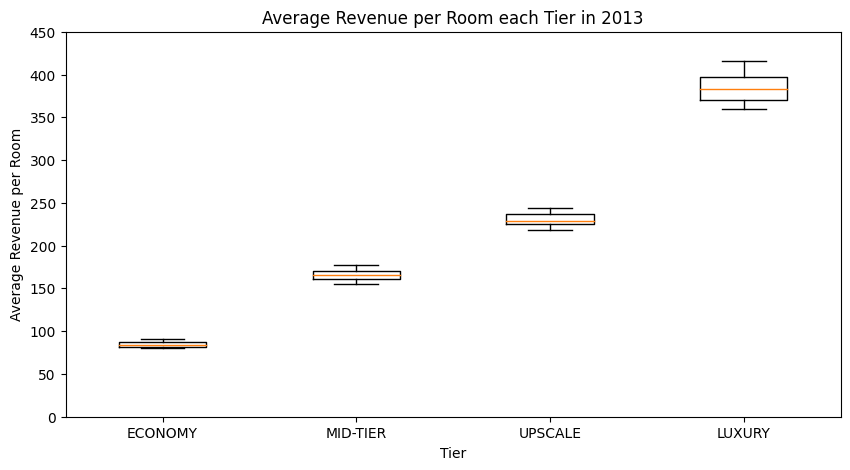

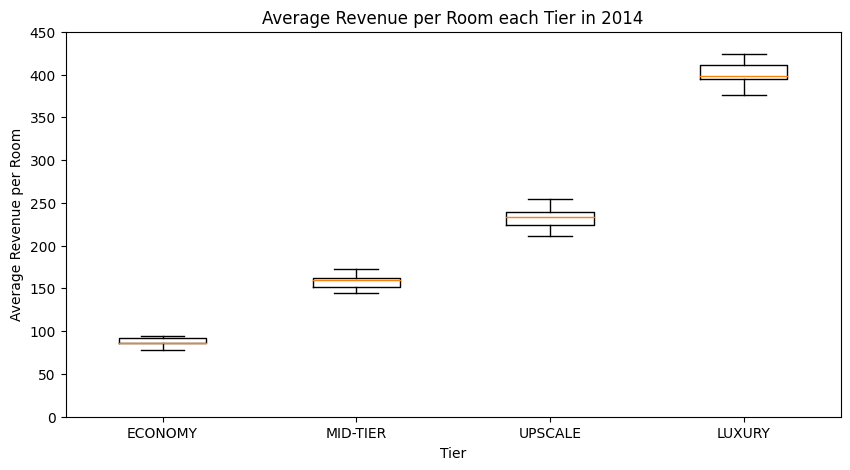

In [5]:
for i in range(len(data_years)):

    data = {}

    tiers = []
    revenues = []

    for index, row in df_8.iterrows():
        month = row['period']
        tier = row['tier']
        revenue_per_avail_room = pd.to_numeric(row['revpar'], errors='coerce')

        if data_years[i] in month:
            tiers.append(tier)
            revenues.append(revenue_per_avail_room)

    data['Tier'] = tiers
    data['Average Revenue per Room'] = revenues

    df = pd.DataFrame(data)

    grouped_df = df.groupby(['Tier'])

    plt.figure(figsize=(10, 5))
    plt.title('Average Revenue per Room each Tier in ' + data_years[i])
    plt.xlabel('Tier')
    plt.ylabel('Average Revenue per Room')
    plt.boxplot([grouped_df.get_group('ECONOMY')['Average Revenue per Room'], 
                 grouped_df.get_group('MID-TIER')['Average Revenue per Room'], 
                 grouped_df.get_group('UPSCALE')['Average Revenue per Room'], 
                 grouped_df.get_group('LUXURY')['Average Revenue per Room']], 
                 labels=['ECONOMY', 'MID-TIER', 'UPSCALE', 'LUXURY'])
    plt.ylim(0, 450)
    plt.show()

Findings and Insight:

- The box plots above shows the variability of the average revenue per room for each room type in 2013 and 2014. Since the box plots are very short, it shows that ther is less dispersion or spread. It also means that most of the data points are concentrated in a relatively narrow range.

- Having a less variation means that the data is more consistent. Which suggests that the current room price rates are well-balanced and appealing to the target market, resulting in consistent average revenue per room throughout all 4 types of hotel rooms across both years 2013 and 2014. (AvgRPR = AOR * ARR)


Summary:
- the data's relative consistency in average revenue per room demonstrates a well-managed pricing approach that resonates with the market demand and optimizes revenue generation for the hotel industry in Singapore.

=======================================================================================================================================

Graph 6 - Scatter Plot

Dataset used:
- monthly-gazetted-hotel-statistics-by-tier.csv

Nature of the datasets:
- It provides information about the Average room rate (ARR), Average occupancy rate (AOR) and Revenue per available room (AOR X ARR) for hotel rooms of different tiers every month from 2013-2015 (not using data from 2015 because of "story-line")

Pretext:
- We have identified that the number of visitor arrivals and demand/market-activity for hotels are steadily rising.

Questions/Goals:
- What are the best hotel room rates that bring in the highest number of occupancy rate for hotels of each tier?

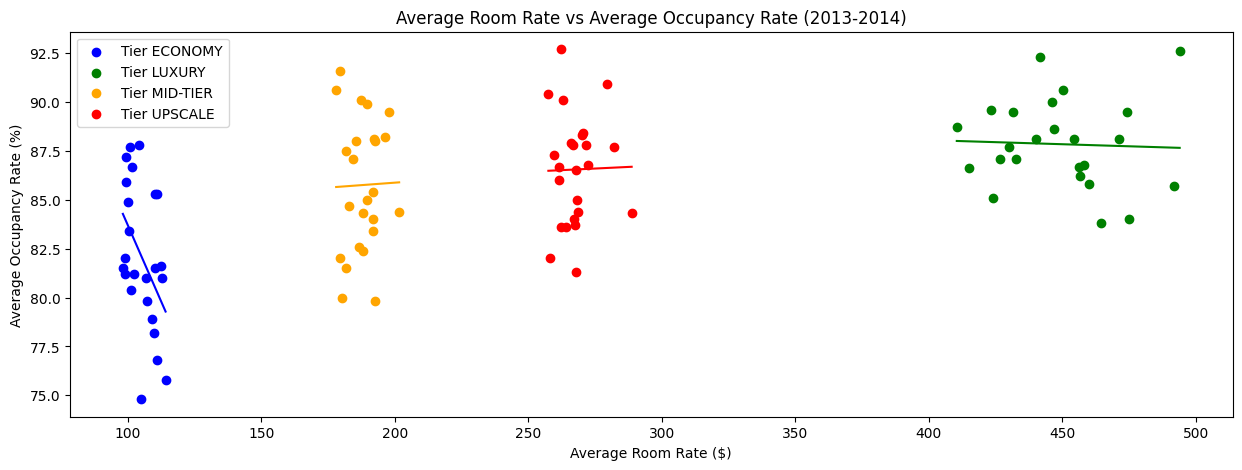

In [6]:
data = {}

tiers = []
average_room_rate = []
average_occupancy_rate = []

for i in range(len(data_years)):

    for index, row in df_8.iterrows():
        
        month = row['period']
        avg_room_rate = pd.to_numeric(row['arr'], errors='coerce')
        avg_occupancy_rate = pd.to_numeric(row['aor'], errors='coerce')
        tier = row['tier']

        if data_years[i] in month:
            tiers.append(tier)
            average_room_rate.append(avg_room_rate)
            average_occupancy_rate.append(avg_occupancy_rate)


data['Tier'] = tiers
data['Average Room Rate'] = average_room_rate
data['Average Occupancy Rate'] = average_occupancy_rate

df = pd.DataFrame(data)


# Group the data by 'Tier'
grouped_df = df.groupby('Tier')

# Define a color palette for each tier (customize as needed)
color_palette = cycle(['blue', 'green', 'orange', 'red'])

# Plot the data and best fit line for each tier
plt.figure(figsize=(15, 5))
plt.title('Average Room Rate vs Average Occupancy Rate (2013-2014)')
plt.xlabel('Average Room Rate ($)')
plt.ylabel('Average Occupancy Rate (%)')

# Loop through each tier and plot the data points and best fit line
for tier, group in grouped_df:
    x = group['Average Room Rate'].to_numpy()
    y = group['Average Occupancy Rate'].to_numpy()

    coefficients = np.polyfit(x, y, 1)
    best_fit_line = np.poly1d(coefficients)

    x_range = np.linspace(min(x), max(x), 100)

    color = next(color_palette)
    plt.scatter(x, y, label=f'Tier {tier}', color=color)
    plt.plot(x_range, best_fit_line(x_range), color=color)

plt.legend()
plt.show()

Findings and Insight:

- For Economy and Luxury rooms, the higher the room rate, the lesser the occupancy rate (people are less willing to pay for these rooms as the prices increase).

- This is especially emphasised on Economy rooms. Since the best fit line has such a sharp negative gradient, it shows that the price range of the rooms which can be let-out to tourists is very small, and the room rates cannot be increased by much.

- For Mid-tier and Upscale rooms, it is different from the previous 2. The scatter plot shows that people are still willing to pay for these 2 types of rooms even when the room rates increase (leading to a inclining best fit line).

- The room rates for these Mid-tier and Upscale rooms are more flexible as compared to Luxury and Economy rooms. (In a sense that since people are willing to pay more for these rooms, the room rates can still be further stretched before people start becoming unwilling to pay, increasing the chances of people paying to stay in these 2 types of rooms if prices remain unchanged)


Summary:
- Since the gradients of the best fit lines for Economy and Luxury tier hotel rooms are negative, the room rates for these 2 types should be kept smaller/in the middle within their respective price ranges. 

- As for Mid-tier and Upscale rooms, where their best-fit lines have a positive gradient, it is fine to take the higher room rate values to let-out to people because people are more willing to pay money for these rooms even when the rates are at the "higher-end" of their respective price ranges.

=======================================================================================================================================

Overall Recommendations based on covered data analysis:

- The Singapore Tourism Board (STB) should invest more time, effort and money into the Hotel industry in Singapore. Why?

    - This is because hotels are the most popular type of accomodations that tourists are paying for

    - The average monthly visitors and hotel room revenue is also currently on the rise, it is crucial for STB to take advantage of this increasing trend, to put in more resources to capitalise this information.

    - By capitalising on the upward trend of market for hotels and incoming visitors in the tourism industry, the STB can not only increase their overall revenue, but bring in more of both new visitors and recurring visitors, to continue expanding and growing the tourism industry in Singapore.

                                                    ========

- Pricing of Room Rates (based on best Average Occupancy Rate to Room Rate "ratio"):

    - Economy: Ideally, the optimal room rate to be charging economy rooms is about $90-$100, which is somewhere at the front of the price range for economy room rates, with the highest Average Occupancy Rate recorded (about 87.6%). However, becareful with the pricing, make sure not to increase it too much as the margin between Tourist-willing-to-pay and Tourist-not-willing-to-pay is very very small.
    

    - Mid-tier: The optimal room rate to be charging for mid-tier rooms is about $170-$180, which is somewhere in the higher price ranges for mid-tier rooms, with the third and fourth highest Average Occupancy rate of about 89%-90%. However, this is fine because people are more willing to pay money for mid-tier rooms (positive best-fit line), and this also means that the overall flexibility of the price range for mid-tier rooms increases, allowing the prices of room rates to be stretched a bit higher.

    - Upscale: The optimal room rate to be charging for Upscale rooms is about $270-$280, which is also somewhere in the higher price ranges for Upscale rooms. Same with mid-tier rooms, people are willing to pay more money for Upscale rooms (positive best-fit line), meaning that the overall flexibility of the price range increases, allowing the prices of room rates to be stretched a bit higher as well.

    - Luxury: The optimal room rate to be charging for Upscale rooms is about $430-$440, this is somewhere near the front of the price range, same as economy room rates. This is because people are less willing to pay more for luxury rooms (negative best-fit line). However, the margin between Tourist-willing-to-pay and Tourist-not-willing-to-pay for luxury rooms is not very small, it is significantly larger as compared to economy rooms. Though stretching the rates a bit higher is possible, it is not recommended to do so, resulted loss in occupancy rate is far too high for the extra money.

                                                    ========

- The STB should also take note of the seasonal fluctuations in visitors across each year/month.

    - March, July, August, December
        - These are the months when Singapore experience seasonal peaks in fluctuations, and the STB should take note of these months to capitalise the peaks in visitor arrivals. For example, since there is a larger amount of visitors during these months, naturally there would be hire demand for hotel rooms. Hence, room rates can be stretched higher, to increase total revenue due to the high demand.

                                                    ========

    - January, Febuary, September
        - These are the months when Singapore experience seasonal dips in fluctuations, take note of these months because these are the months where Singapore usually experiences a drop in visitor arrivals. This translates to lesser demands for hotel rooms, hence, people are usually less willing to pay more for rooms. Thus, dropping the room rates by giving discounts during these months, can result in consistent or higher occupancy rate and revenue even with the dip in numbers.

                                                    ========

    -  April, May, June, October, November
        - These months are when Singapore experiences zero to barely any seasonal fluctuations, these months share a consistent number of visitor arrivals in general, and room demands should be somewhere in the middle, not too high not too low. However, smaller discounts can be given during these months, to try and increase the number of visitors to Singapore, to increase overall occupancy rate and revenue 

                                                    ========

- General Guidelines for room pricing:

    - The room rates should be kept relatively similar to past years (2013 and 2014). This is because the average room rates in 2013 and 2014, have proven to be creating  Average Occupancy Rates that work together with each other, to produce the Average Revenue Per Room that leads to the increasing trend of monthly Hotel Room Revenues across the 2 years respectively

    - However, there are uncontrollable factors to keep in mind (e.g. Inflation). Do keep track with the world's economy, and scale the prices accordingly in the future, but for now, the best room rates in general should follow closely with the ones in 2013 and 2014.
